In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import re
import os
import operator
import collections

In [3]:
# npl related
# from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [4]:
from classifiers import *

ImportError: No module named lightgbm

# Inputs

In [ ]:
# Numbers of observation to be selected from dataframe
num_examples = 100
# Get test and train dataframes
path_img = '../img/'
path_data =  '../data/'

# Pre train and test data

In [5]:
review = pd.read_csv('data/yelp.csv')

In [6]:
review.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [7]:
cols_to_drop = ['business_id', 'user_id', 'review_id', 'type']

review.drop(cols_to_drop, axis=1, inplace=True)

In [8]:
review.head()

,date,stars,text,cool,useful,funny
0,2011-01-26,5,My wife took me here on my birthday for breakf...,2,5,0
1,2011-07-27,5,I have no idea why some people give bad review...,0,0,0
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,0,1,0
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,0,0


In [9]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    10000 non-null  object
 1   stars   10000 non-null  int64 
 2   text    10000 non-null  object
 3   cool    10000 non-null  int64 
 4   useful  10000 non-null  int64 
 5   funny   10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 468.9+ KB


In [10]:
review.date = pd.to_datetime(review.date)

In [11]:
review['year'] = review['date'].dt.year
review['month'] = review['date'].dt.month
review['day'] = review['date'].dt.day

In [12]:
review.head()

,date,stars,text,cool,useful,funny,year,month,day
0,2011-01-26,5,My wife took me here on my birthday for breakf...,2,5,0,2011,1,26
1,2011-07-27,5,I have no idea why some people give bad review...,0,0,0,2011,7,27
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,0,1,0,2012,6,14
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,2010,5,27
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,0,0,2012,1,5


In [13]:
review.drop('date', axis=1, inplace=True)
review['label'] = review.stars.map(lambda x: 1 if int(x) > 3 else 0)

[Text(0.5, 1.0, 'Review Label')]

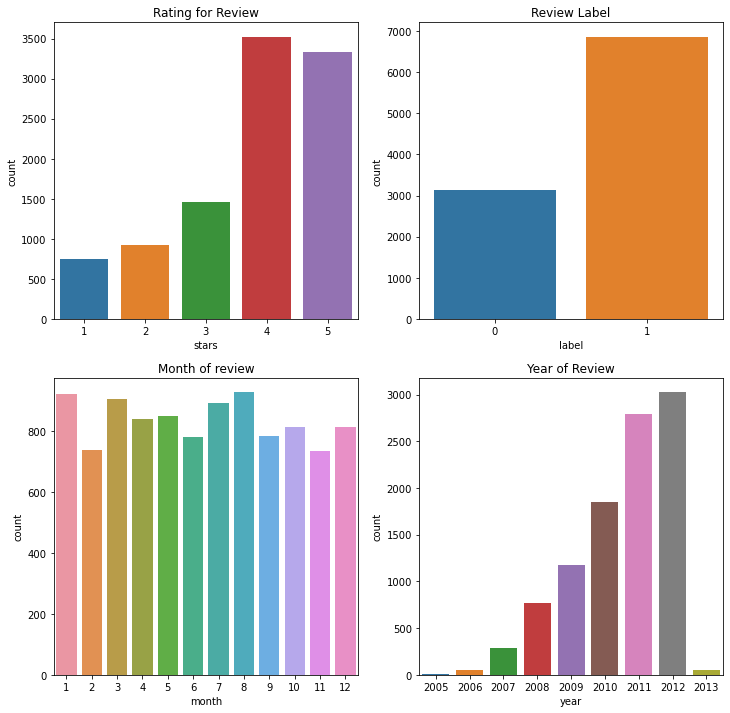

In [14]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))

sns.countplot(x='stars', data=review, ax=axs[0, 0])
axs[0, 0].set(title='Rating for Review')
sns.countplot(x='month', data=review, ax=axs[1, 0])
axs[1, 0].set(title='Month of review')
sns.countplot(x='year', data=review, ax=axs[1, 1])
axs[1, 1].set(title='Year of Review')
sns.countplot(x='label', data=review, ax=axs[0, 1])
axs[0, 1].set(title='Review Label')


# Cleaning Text

In [15]:
>>> import nltk
>>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\desai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
review

,stars,text,cool,useful,funny,year,month,day,label
0,5,My wife took me here on my birthday for breakf...,2,5,0,2011,1,26,1
1,5,I have no idea why some people give bad review...,0,0,0,2011,7,27,1
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,2012,6,14,1
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,2010,5,27,1
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,2012,1,5,1
...,...,...,...,...,...,...,...,...,...
9995,3,First visit...Had lunch here today - used my G...,1,2,0,2012,7,28,0
9996,4,Should be called house of deliciousness!\n\nI ...,0,0,0,2012,1,18,1
9997,4,I recently visited Olive and Ivy for business ...,0,0,0,2010,11,16,1
9998,2,My nephew just moved to Scottsdale recently so...,0,0,0,2012,12,2,0


In [17]:
# cleaning reviews
review['text_c'] = review['text'].apply(get_cleaned_text, words_len=2,
                                          remove_stopwords=True, is_stemming=True,
                                          is_lemma=False, split=False)

# Story length

In [18]:
review['text_len'] = review['text_c'].str.len()

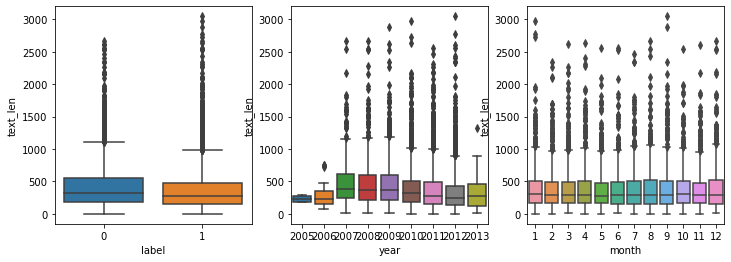

In [19]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))
sns.boxplot(x= "label" , y= "text_len", data=review, ax=axs[0])
sns.boxplot(x= "year" , y= "text_len", data=review, ax=axs[1])
sns.boxplot(x= "month" , y= "text_len", data=review, ax=axs[2])

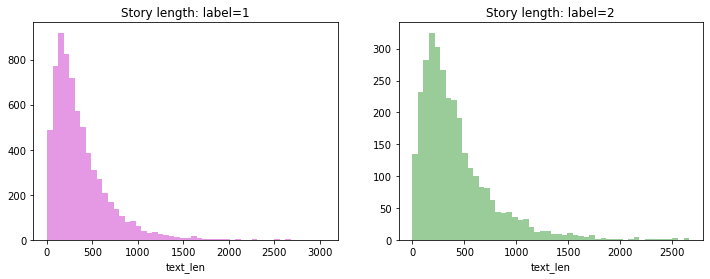

In [20]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

sns.distplot(review[review.label==1]['text_len'], ax=axs[0], kde=False, color='m')
axs[0].set(title='Story length: label=1');

sns.distplot(review[review.label==0]['text_len'], ax=axs[1], kde=False, color='g')
axs[1].set(title='Story length: label=2');


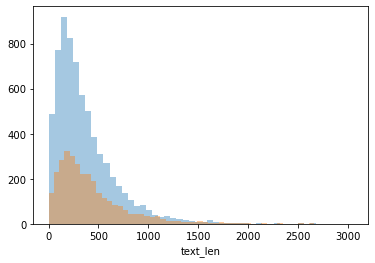

In [21]:
sns.distplot(review[review.label==1]['text_len'], kde=False)
sns.distplot(review[review.label==0]['text_len'], kde=False)

# Word Cloud

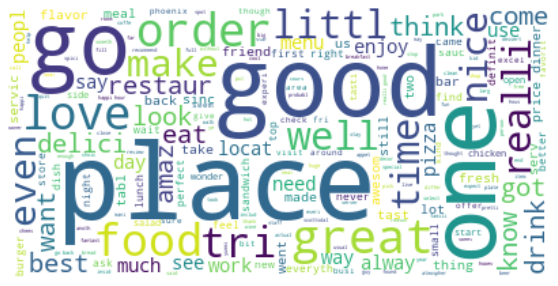

In [22]:
str1 = review[review.label==1].text_c.values.tolist()
str1 = " ".join(str1)
wc = WordCloud(background_color='white').generate(str1)
plt.figure(figsize=(16,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

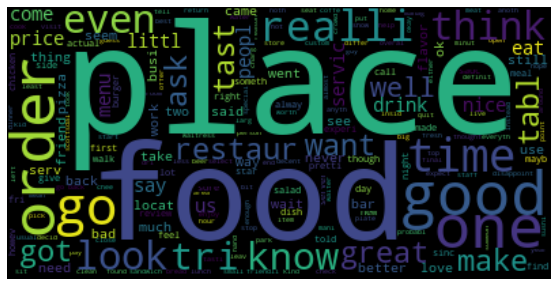

In [23]:
str2 = review[review.label==0].text_c.values.tolist()
str2 = " ".join(str2)
wc = WordCloud(background_color='black').generate(str2)
plt.figure(figsize=(16,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Ploting cout of the classes

step: 5 plotting label counts
step 5 completed......



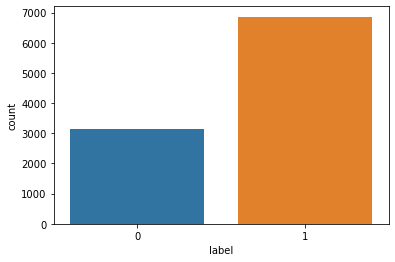

In [24]:
print ('step: 5 plotting label counts')
sns.countplot(x='label', data=review)
print ('step 5 completed......\n')

# Vectorizing Text

In [25]:
review = review[['text', 'text_c', 'label']]

In [26]:
review.head()

,text,text_c,label
0,My wife took me here on my birthday for breakf...,wife took birthday breakfast excel weather per...,1
1,I have no idea why some people give bad review...,idea peopl give bad review place goe show plea...,1
2,love the gyro plate. Rice is so good and I als...,love gyro plate rice good also dig candi select,1
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",rosi dakota love chaparr dog park conveni surr...,1
4,General Manager Scott Petello is a good egg!!!...,gener manag scott petello good egg go detail l...,1


In [27]:
from sklearn.feature_extraction.text import TfidfTransformer

In [28]:
cv = CountVectorizer()
cv.fit_transform(review['text_c'])
freq_term_matrix = cv.transform(review['text_c'])

tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
X = tfidf.fit_transform(freq_term_matrix).toarray()

In [29]:
y = review['label']
y.shape

(10000,)

In [30]:
all_ft = pd.DataFrame(X, columns=cv.get_feature_names())

# Feature importance: based on frequency

In [31]:
print ('step: 6 plotting feature importance')

max_words = 50

words = cv.get_feature_names()
word_frequency = X.sum(axis=0)

feature_imp = dict(zip(words, word_frequency))
sorted_features = sorted(feature_imp.items(),
                                key=operator.itemgetter(1), reverse=True)
df_imp = pd.DataFrame(sorted_features, columns=['word', 'frequency'])

step: 6 plotting feature importance


step 6 completed......



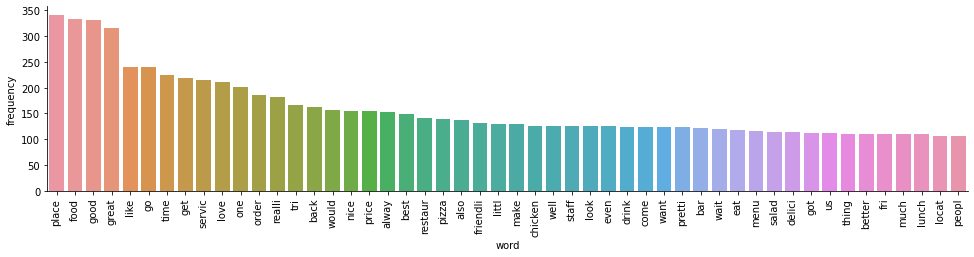

In [32]:
sns_plot = sns.catplot(x='word' , y='frequency', kind='bar', data=df_imp[0:max_words])
sns_plot.set_xticklabels(rotation=90)
# sns_plot.fig.set_figwidth(16)
# sns_plot.fig.set_figheight(4)
fig = plt.gcf()
fig.set_size_inches(16, 3)
print ('step 6 completed......\n')

# Feature importance : ExtraTree

In [33]:
model = ExtraTreesClassifier()
fit = model.fit(X, y)
print(fit.feature_importances_)

[2.52047973e-05 7.02966619e-06 5.75034444e-06 ... 3.99532342e-06
 0.00000000e+00 1.66312772e-06]


In [34]:
feat_imp_dict = dict(zip(cv.get_feature_names(), fit.feature_importances_))

ft_n_imp = pd.DataFrame(list(feat_imp_dict.items()), columns=['feature', 'score'])

ft_n_imp = ft_n_imp.sort_values(by='score', ascending=False)

In [35]:
# ft_n_imp = ft_n_imp['feature', 'score']
ft_n_imp = ft_n_imp[['feature', 'score']]

In [36]:

def classifier_eval(clf, X_train, X_test, y_train, y_test, y_pred_train, avg='weighted'):

    y_pred_train = clf.predict(X_train)
    y_pred = clf.predict(X_test)

    test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    train_acc = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    # precision = precision_score(y_test, y_pred)
    # area_under_curve = auc(X_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)

    print('Test accuracy: ', test_acc)
    print('Train accuracy: ', train_acc)
    print('Test f1_micro: ', f1_micro)
    print('Test f1_macro: ', f1_macro)
    print('Test f1_weighted: ', f1_weighted)
    # print('AUC score: ', area_under_curve)
    print(classification_report(y_test, y_pred))


# Data Split

In [37]:
selected_features = ft_n_imp['feature'][:5000].values.tolist()

In [38]:
X = all_ft[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=123)
df_cv = pd.DataFrame(X, columns=cv.get_feature_names())
train_cv = pd.DataFrame(X_train, columns=cv.get_feature_names())
test_cv = pd.DataFrame(X_test, columns=cv.get_feature_names())
print ('\nstep 2 completed')


step 2 completed


# MultiNomial Naivebayes

In [39]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

Test accuracy:  0.7423333333333333
Train accuracy:  0.7817142857142857
Test f1_micro:  0.7423333333333333
Test f1_macro:  0.5794578869418138
Test f1_weighted:  0.676991228701706
              precision    recall  f1-score   support

           0       0.94      0.19      0.32       941
           1       0.73      0.99      0.84      2059

    accuracy                           0.74      3000
   macro avg       0.83      0.59      0.58      3000
weighted avg       0.79      0.74      0.68      3000



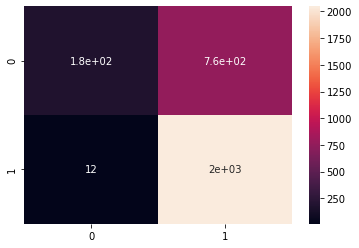

In [40]:
classifier_eval(clf, X_train, X_test, y_train, y_test, y_pred_train)

# All models

In [41]:
df_r, cm = clf_model(X_train, y_train, X_test, y_test, model=None, path4plot=None)

	 1. --> KNearestNeighbour
	 2. --> GaussianNaiveBayes
	 3. --> MultinomialNaiveBayes
	 4. --> DecisionTree
	 5. --> RandomForest
	 6. --> ExtraTree
	 7. --> SupportVectorMachine
	 8. --> LogisticRegression
	 9. --> XGBoost
	 10. --> AdaptiveBoost
	 11. --> Nu-SupportVector
	 12. --> LinearSupportVecor
	 13. --> StochasticGradientBoost
	 14. --> GaussianProcessClassifier
	 15. --> BaggingClassifier
	 16. --> GradientBoostingClassifier
	 17. --> LightGradientBoost


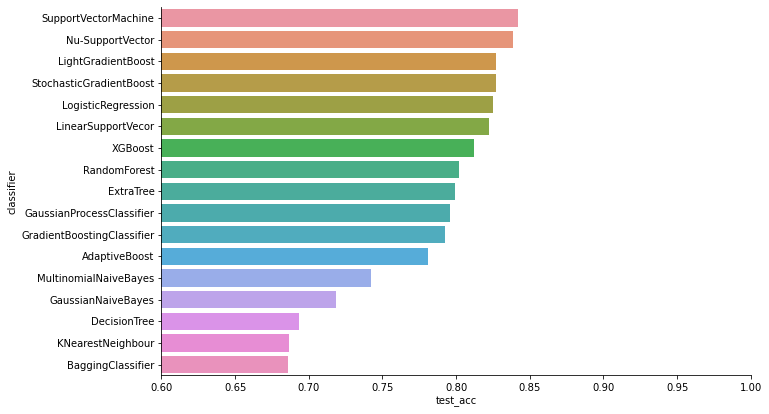

In [54]:
df_r = df_r.sort_values(by='test_acc', ascending=False)
g = sns.catplot(x='test_acc', y='classifier', kind='bar', data=df_r)
g.set(xlim=(0.6, 1))
fig = plt.gcf()
fig.set_size_inches(16, 6)

In [55]:
df_r.sort_values(by='test_acc', ascending=False)

,classifier,train_acc,test_acc,f1_wighted,f1_macro,f1_macro
6,SupportVectorMachine,0.985143,0.842000,0.836405,0.842000,0.804493
10,Nu-SupportVector,0.981286,0.838333,0.831845,0.838333,0.798414
16,LightGradientBoost,0.957143,0.827333,0.820835,0.827333,0.785567
12,StochasticGradientBoost,0.928286,0.827000,0.820450,0.827000,0.785075
7,LogisticRegression,0.885143,0.825333,0.814417,0.825333,0.774534
11,LinearSupportVecor,0.960143,0.822333,0.817869,0.822333,0.783912
8,XGBoost,0.961571,0.812333,0.805058,0.812333,0.766511
4,RandomForest,1.000000,0.801667,0.781190,0.801667,0.728805
5,ExtraTree,1.000000,0.799000,0.776808,0.799000,0.722519
13,GaussianProcessClassifier,0.858143,0.796000,0.771727,0.796000,0.715190


In [56]:
df_r.sort_values(by='train_acc', ascending=False)

,classifier,train_acc,test_acc,f1_wighted,f1_macro,f1_macro
5,ExtraTree,1.000000,0.799000,0.776808,0.799000,0.722519
4,RandomForest,1.000000,0.801667,0.781190,0.801667,0.728805
3,DecisionTree,1.000000,0.693333,0.692520,0.693333,0.642000
6,SupportVectorMachine,0.985143,0.842000,0.836405,0.842000,0.804493
10,Nu-SupportVector,0.981286,0.838333,0.831845,0.838333,0.798414
8,XGBoost,0.961571,0.812333,0.805058,0.812333,0.766511
11,LinearSupportVecor,0.960143,0.822333,0.817869,0.822333,0.783912
16,LightGradientBoost,0.957143,0.827333,0.820835,0.827333,0.785567
12,StochasticGradientBoost,0.928286,0.827000,0.820450,0.827000,0.785075
7,LogisticRegression,0.885143,0.825333,0.814417,0.825333,0.774534


# Hyperparameter tuning

## Random Forest

In [69]:
n_estimators = [100, 500, 1000]
max_features = ['auto']
max_depth = [2, 10]
max_depth.append(None)
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [70]:
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [71]:
# cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)

In [72]:
clf = RandomForestClassifier()

rcv = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, cv=3, scoring='accuracy', verbose=2)
# rcv = GridSearchCV(estimator=clf, param_grid=param_grid, cv=2, scoring='accuracy', verbose=1)
rcv.fit(X_train, y_train)
rcv.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, total=  20.3s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.2s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, total=  19.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, total=  19.6s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, total=   2.7s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, total=   2.6s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 
[CV]  n_estimators=100, min_samples_split

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 12.4min finished


RandomForestClassifier(bootstrap=False, min_samples_leaf=2, min_samples_split=5)

In [73]:
print("Best: %f using %s\n" % (rcv.best_score_, rcv.best_params_))
means = rcv.cv_results_['mean_test_score']
stds = rcv.cv_results_['std_test_score']
params = rcv.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.796429 using {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}

0.686286 (0.000063) with: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 2, 'bootstrap': True}
0.686286 (0.000063) with: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 2, 'bootstrap': True}
0.691571 (0.000342) with: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
0.696285 (0.002887) with: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
0.686286 (0.000063) with: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 2, 'bootstrap': False}
0.698143 (0.002090) with: {'n_estimators': 100, 'min_samples_split': 2

## XGBoost

In [74]:
param_grid = {"learning_rate"    : [0.05, 0.10, 0.3, 0.5, 0.7] ,
 "max_depth"        : [ 3, 9, 15, 18],
 "min_child_weight" : [2, 7, 10, 15],
 "gamma"            : [ 0.0, 0.1, 0.2, 0.3],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7, 1 ] }

In [81]:
import numba
from numba import cuda

In [82]:
@numba.jit(nopython=True)
import time
t0 = time.time()
clf = XGBClassifier()

t0 = time.time()clf = XGBClassifier()
rcv = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, cv=3, scoring='accuracy', verbose=0)
rcv.fit(X_train, y_train)

SyntaxError: invalid syntax (<ipython-input-82-5ccc6f84542a>, line 2)

In [76]:
print("Best: %f using %s\n" % (rcv.best_score_, rcv.best_params_))
means = rcv.cv_results_['mean_test_score']
stds = rcv.cv_results_['std_test_score']
params = rcv.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.806571 using {'min_child_weight': 7, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 1}

0.788144 (0.010687) with: {'min_child_weight': 7, 'max_depth': 9, 'learning_rate': 0.7, 'gamma': 0.1, 'colsample_bytree': 0.5}
0.806428 (0.002519) with: {'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.5, 'gamma': 0.1, 'colsample_bytree': 0.3}
0.783428 (0.009143) with: {'min_child_weight': 15, 'max_depth': 9, 'learning_rate': 0.5, 'gamma': 0.2, 'colsample_bytree': 1}
0.802143 (0.001429) with: {'min_child_weight': 7, 'max_depth': 9, 'learning_rate': 0.3, 'gamma': 0.3, 'colsample_bytree': 0.7}
0.803572 (0.003291) with: {'min_child_weight': 10, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0.1, 'colsample_bytree': 0.7}
0.806571 (0.002455) with: {'min_child_weight': 7, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 1}
0.788430 (0.009588) with: {'min_child_weight': 7, 'max_depth': 9, 'learning_rate': 0.7, 'gamma': 0.1, 'colsample_bytree

## Stochastic Gradient Classifier

Test accuracy:  0.8253333333333334
Train accuracy:  0.9267142857142857
Test f1_micro:  0.8253333333333334
Test f1_macro:  0.7819621080103127
Test f1_weighted:  0.818202040679324
              precision    recall  f1-score   support

           0       0.79      0.60      0.68       941
           1       0.84      0.93      0.88      2059

    accuracy                           0.83      3000
   macro avg       0.81      0.77      0.78      3000
weighted avg       0.82      0.83      0.82      3000



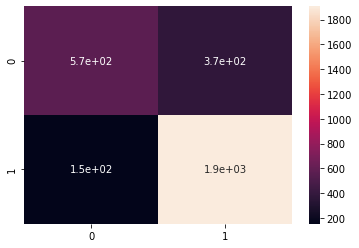

In [77]:
clf = SGDClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_pred_train = clf.predict(X_train)

classifier_eval(clf, X_train, X_test, y_train, y_test, y_pred_train)

In [78]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc(fpr, tpr)

0.7654268164596063

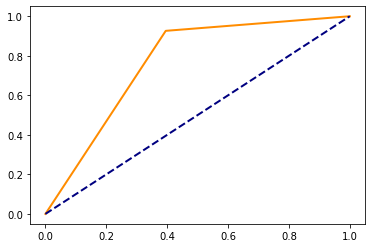

In [79]:
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')